# Завантаження зображень

In [101]:
from matplotlib.image import imread
import matplotlib.pyplot as plt

car1 = imread("img/car1.png")
car2 = imread("img/car2.jpg")

## Виведемо їх

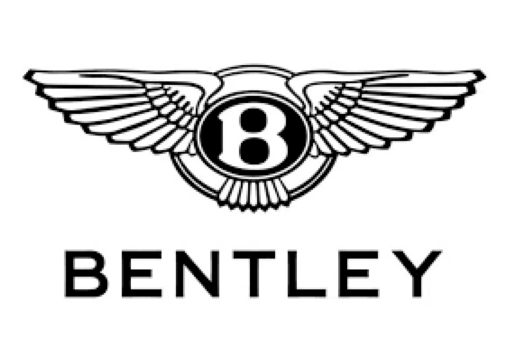

In [102]:
plt.imshow(car1)
plt.axis('off')  # сховати осі
plt.show()

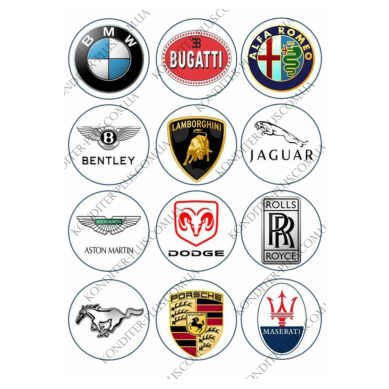

In [103]:
plt.imshow(car2)
plt.axis('off')  # сховати осі
plt.show()

# Застосовуємо SVD стиснення
## Оптимізуємо канали зображень

In [104]:
height1, width1, channels1 = car1.shape
flat_car1 = car1.reshape(-1, width1 * channels1)

height2, width2, channels2 = car2.shape
flat_car2 = car2.reshape(-1, width2 * channels2)

## Застосовуємо SVD декомпозицію

In [105]:
import numpy as np

U1, S1, Vt1 = np.linalg.svd(flat_car1, full_matrices=True)
U2, S2, Vt2 = np.linalg.svd(flat_car2, full_matrices=True)

## Виводимо перші k значень матриць
### Для car1.png

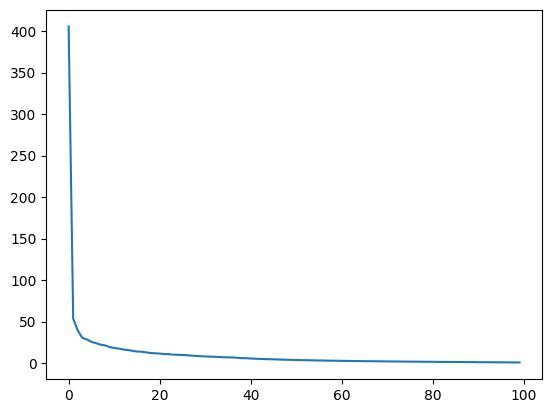

In [106]:
k = 100

plt.plot(np.arange(k), S1[:k])

### Для car2.jpg

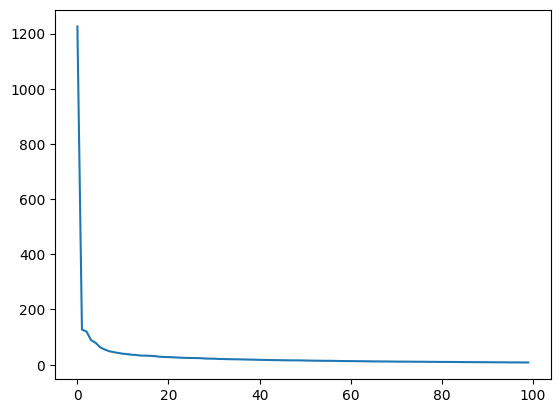

In [107]:
plt.plot(np.arange(k), S2[:k])

## Застосовуємо SVD стиснення
### Створюємо обʼєкт стискувача

In [108]:
from sklearn.decomposition import TruncatedSVD

svd1 = TruncatedSVD(n_components=k)
svd2 = TruncatedSVD(n_components=k)

### Стискаємота та реконструюємо  car1.png

In [109]:
truncated_car1 = svd1.fit_transform(flat_car1)
reconstructed_car1=svd1.inverse_transform(truncated_car1)

### Стискаємо та реконструюємо car2.jpg

In [110]:
truncated_car2 = svd2.fit_transform(flat_car2)
reconstructed_car2=svd2.inverse_transform(truncated_car2)

### Виводимо середньоквадратичне відхилення між оригінальним та реконструйованим зображенням для car1

In [111]:
reconstruction_error1 = np.mean(np.square(reconstructed_car1 - flat_car1))
reconstruction_error1

np.float32(9.643338e-06)

### Виводимо середньоквадратичне відхилення між оригінальним та реконструйованим зображенням для car1

In [112]:
reconstruction_error2 = np.mean(np.square(reconstructed_car2 - flat_car2))
reconstruction_error2

np.float32(0.0018588861)

### Покажемо реконструйовані зображення

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-11.942272..269.24265].


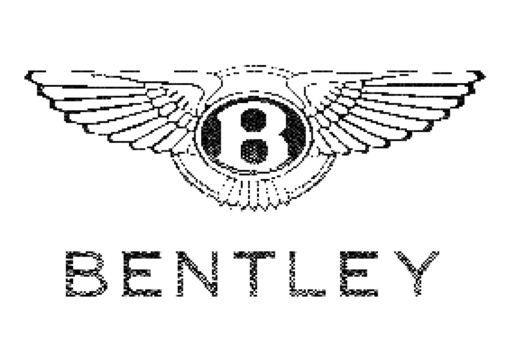

In [113]:
reconstructed_car1 = reconstructed_car1.reshape(height1, width1, channels1)
# Якщо реконструкція у [0, 1], домасштабуємо до [0, 255]
max_val = float(np.nanmax(reconstructed_car1)) if reconstructed_car1.size else 0.0
if max_val <= 1.5:  # припускаємо нормалізоване зображення
    reconstructed_car1 *= 255.0


plt.imshow(reconstructed_car1)
plt.axis('off')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-57.35325..307.22134].


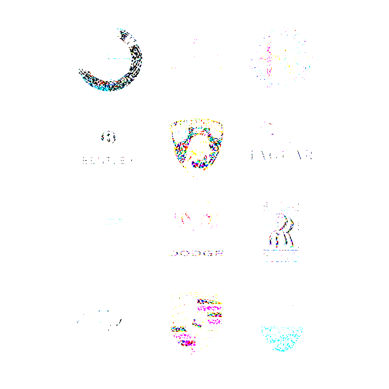

In [114]:
reconstructed_car2 = reconstructed_car2.reshape(height2, width2, channels2)
max_val = float(np.nanmax(reconstructed_car2)) if reconstructed_car2.size else 0.0
if max_val <= 1.5:  # припускаємо нормалізоване зображення
    reconstructed_car2 *= 255.0

plt.imshow(reconstructed_car2)
plt.axis('off')
plt.show()

# Обʼєднаємо усі кроки у 5 функцій
Заодно внесемо деякі правки в функцію реконструкції зображення

In [115]:
def optimize_img(img):
    height, width, channels = img.shape
    img1 = img.reshape(-1, width * channels)
    return img1

def fit_svd(transformed_img, k):
    svd_model = TruncatedSVD(n_components=k)
    return svd_model, svd_model.fit_transform(transformed_img)

def transform_image(img, k):
    inverted_img = optimize_img(img)
    svd_model, truncated_img = fit_svd(inverted_img, k)
    return svd_model, truncated_img

def reconstruct_image(original_img, svd_model, trucated_img):
    height, width, channels = original_img.shape
    reconstructed_img =  svd_model.inverse_transform(trucated_img)
    reconstructed_img = reconstructed_img.reshape(height, width, channels)

    # Якщо реконструкція у [0, 1], домасштабуємо до [0, 255]
    max_val = float(np.nanmax(reconstructed_img)) if reconstructed_img.size else 0.0
    if max_val <= 1.5:  # припускаємо нормалізоване зображення
        reconstructed_img *= 255.0
    reconstructed_img = np.clip(reconstructed_img, 0 , 255 ).astype( 'uint8' )
    return reconstructed_img

def show_image(img):
    plt.imshow(img)
    plt.axis('off')
    plt.show()

# Застосуємо перетворення з різними ступенями _k_

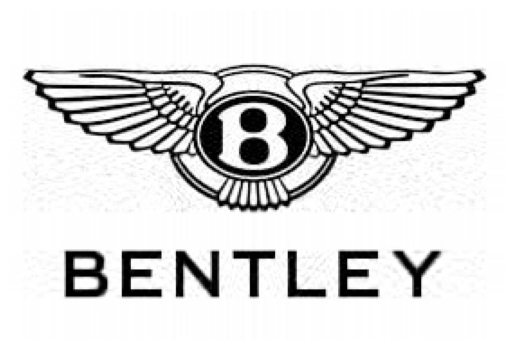

In [116]:
reinarnated_car1_50 = reconstruct_image(car1, *transform_image(car1, 50))
show_image(reinarnated_car1_50)

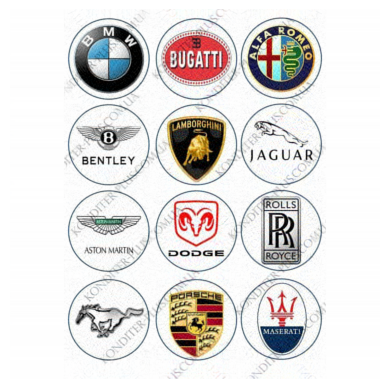

In [117]:
reinarnated_car2_50 = reconstruct_image(car2, *transform_image(car2, 112))
show_image(reinarnated_car2_50)

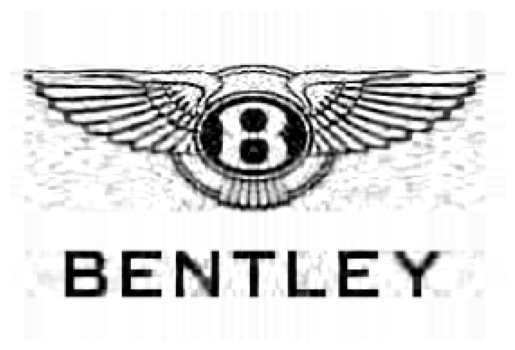

In [118]:
reinarnated_car1_20 = reconstruct_image(car1, *transform_image(car1, 20))
show_image(reinarnated_car1_20)

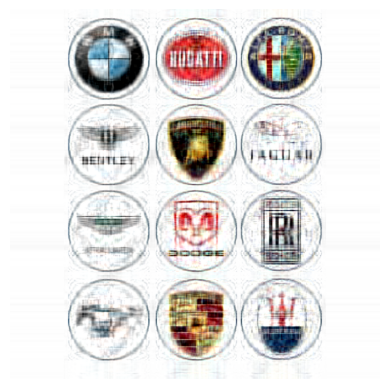

In [119]:
reinarnated_car2_20 = reconstruct_image(car2, *transform_image(car2, 20))
show_image(reinarnated_car2_20)

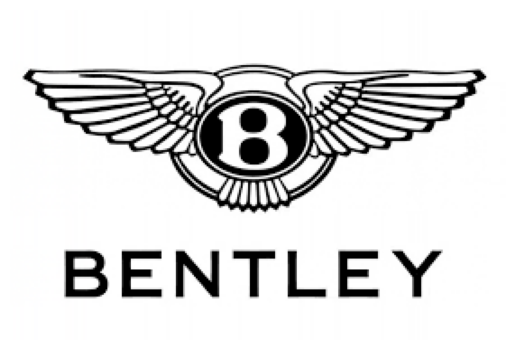

In [120]:
reinarnated_car1_1000 = reconstruct_image(car1, *transform_image(car1, 1000))
show_image(reinarnated_car1_1000)

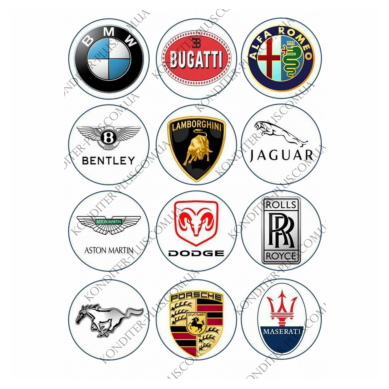

In [121]:
reinarnated_car2_1000 = reconstruct_image(car2, *transform_image(car2, 1000))
show_image(reinarnated_car2_1000)

# Висновки

Використання розкладу SVD - доволі потужний інструмент стиснення даних. Та як показала наша практика, реконструкція стисненого зображення нк завжди відновлює початкові дані. За моїми спостереженнями, чим бульше значення n_components передається трансформеру SVD, тим точніше відновлюється початкове зображення.